In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/3) Sentiment dataset.csv')

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Display information about the dataset
print("\nDataset Information:")
df.info()

# Display the distribution of the 'Sentiment' column
print("\nSentiment Distribution:")
display(df['Sentiment'].value_counts())

First 5 rows of the dataset:


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB

Sentiment Distribution:


,count
Sentiment,
Positive,44
Joy,42
Excitement,32
Neutral,14
Contentment,14
...,...
Adrenaline,1
Harmony,1
ArtisticBurst,1


In [2]:
# Display the distribution of the 'Sentiment' column
print("\nSentiment Distribution:")
display(df['Sentiment'].value_counts())


Sentiment Distribution:


,count
Sentiment,
Positive,44
Joy,42
Excitement,32
Neutral,14
Contentment,14
...,...
Adrenaline,1
Harmony,1
ArtisticBurst,1


In [3]:
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Cleans and preprocesses a given text.

    Args:
        text: The input string to be processed.

    Returns:
        The processed text as a single string.
    """
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back to a single string
    return ' '.join(lemmatized_tokens)

# Apply the preprocessing function to the 'Text' column
df['processed_text'] = df['Text'].apply(preprocess_text)

# Display the first few rows with the new column
display(df[['Text', 'processed_text']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,processed_text
0,Enjoying a beautiful day at the park! ...,enjoying beautiful day park
1,Traffic was terrible this morning. ...,traffic terrible morning
2,Just finished an amazing workout! 💪 ...,finished amazing workout
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,trying new recipe dinner tonight


In [4]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df['processed_text']
y = df['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (585,)
X_test shape: (147,)
y_train shape: (585,)
y_test shape: (147,)


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limiting features to 5000 for manageability

# Apply fit_transform to the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Apply transform to the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Print the shapes of the resulting TF-IDF matrices
print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

Shape of X_train_tfidf: (585, 2032)
Shape of X_test_tfidf: (147, 2032)


In [6]:
from imblearn.over_sampling import RandomOverSampler

# Create a RandomOverSampler object
ros = RandomOverSampler(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_tfidf, y_train)

# Print the class distribution after oversampling
print("Class distribution after oversampling:")
print(y_train_resampled.value_counts())

Class distribution after oversampling:
Sentiment
Sad                 35
Jealousy            35
Intimidation        35
Adventure           35
Envious             35
                    ..
Frustration         35
Overwhelmed         35
Ecstasy             35
Adrenaline          35
Exhaustion          35
Name: count, Length: 241, dtype: int64


In [7]:
from sklearn.svm import SVC

# Create an SVC object
svm_model = SVC(probability=True, random_state=42)

# Train the model using the resampled training data
svm_model.fit(X_train_resampled, y_train_resampled)

SVC(probability=True, random_state=42)

Training Accuracy: 0.9980
Test Accuracy: 0.1701

Classification Report for Test Set:
                        precision    recall  f1-score   support

         Acceptance          0.00      0.00      0.00         2
      Acceptance             0.00      0.00      0.00         0
           Admiration        0.00      0.00      0.00         1
        Admiration           0.00      0.00      0.00         1
         Affection           1.00      1.00      1.00         1
      Ambivalence            0.00      0.00      0.00         1
         Anger               0.00      0.00      0.00         1
        Anticipation         0.00      0.00      0.00         1
        Arousal              0.00      0.00      0.00         3
                  Awe        0.00      0.00      0.00         1
         Awe                 0.00      0.00      0.00         1
                  Bad        0.00      0.00      0.00         1
             Betrayal        0.00      0.00      0.00         2
        Betrayal  

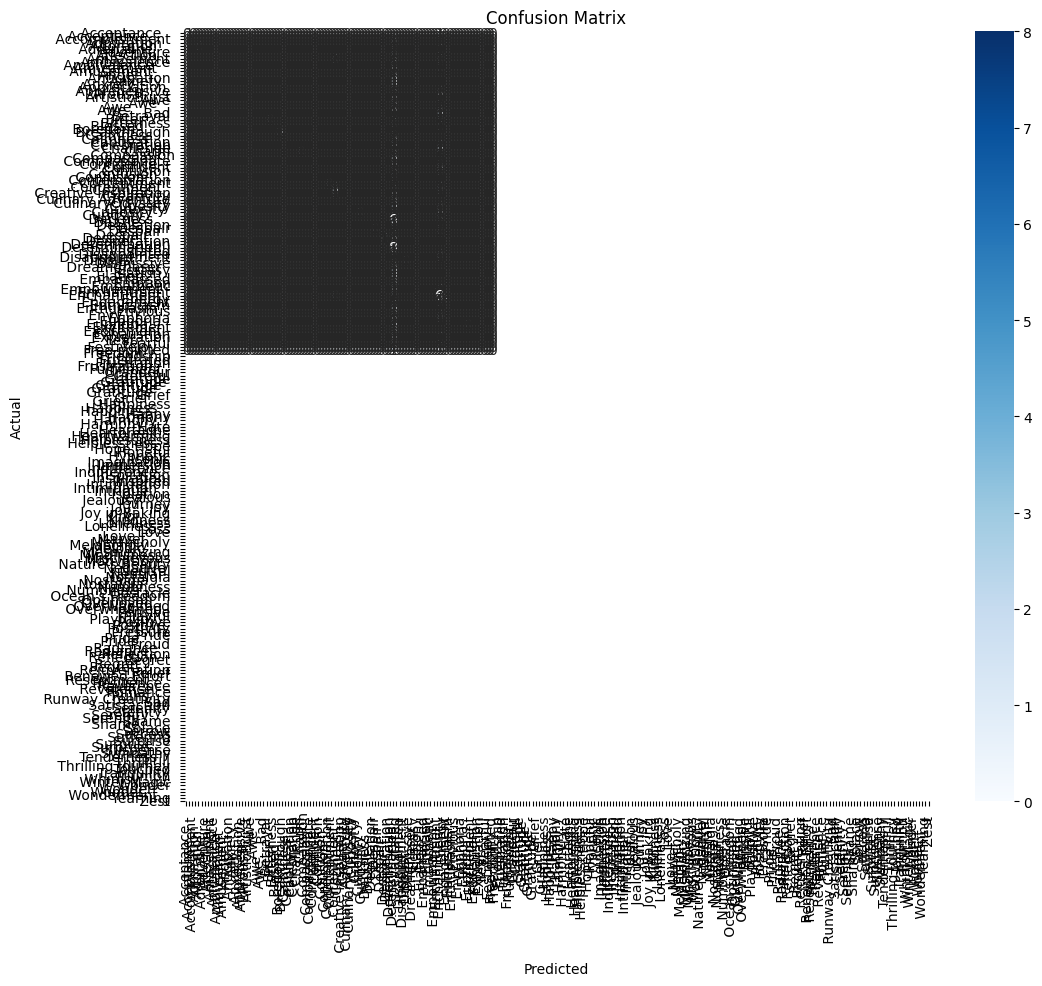

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the training and test data
y_train_pred = svm_model.predict(X_train_resampled)
y_test_pred = svm_model.predict(X_test_tfidf)

# Calculate and print accuracy scores
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate and print the classification report
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred, zero_division=0))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Visualize the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Summary:

### Q&A
**What was the main challenge in this sentiment analysis project?**
The main challenge was the severe class imbalance in the dataset, where many sentiment categories had very few examples, which could negatively impact the model's ability to learn and generalize.

**What was the final performance of the trained model?**
The model showed a classic case of overfitting. It achieved a very high accuracy of 99.8% on the resampled training data but performed very poorly on the unseen test data, with an accuracy of only 17.0%.

### Data Analysis Key Findings
*   The initial data exploration confirmed a significant class imbalance, with 279 unique sentiment categories. For instance, "Positive" had 44 instances, while many others had only one.
*   Advanced text preprocessing, including lemmatization, was successfully applied to clean and normalize the text data.
*   To address the imbalance, `RandomOverSampler` was used on the training set, resulting in each sentiment class having an equal number of samples (35).
*   A Support Vector Machine (SVM) model was trained on this balanced data.
*   Evaluation revealed a massive discrepancy between training accuracy (99.80%) and test accuracy (17.01%), indicating severe overfitting.
*   The classification report and confusion matrix for the test set confirmed the poor performance, with most classes having precision, recall, and F1-scores of 0.00.

### Insights or Next Steps
*   The severe overfitting suggests that simply balancing the data is not enough. The model memorized the training data instead of learning generalizable patterns. Future efforts should focus on regularization techniques, trying simpler models, or reducing the feature space to combat overfitting.
*   The large number of sentiment classes with very few samples is a core problem. It would be beneficial to group similar sentiment categories or remove those with insufficient data to create a more manageable and balanced classification task.
